## Sales Analysis 2003

In [30]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt


# Read input file
sales_frame = fc.read_german_csv("data/nyc-rolling-sales_2003.csv")

#print(sales_frame.head())
#print(sales_frame.dtypes)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Replacing the "." and the "$" in the string and changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = sales_frame["SALE PRICE"].str.replace(".", "")
sales_frame["SALE PRICE"] = sales_frame["SALE PRICE"].str.replace("$", "")
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")
# Changing LSF and GSF to numeric values (from str)
sales_frame["LAND SQUARE FEET"] = pd.to_numeric(sales_frame["LAND SQUARE FEET"], errors="coerce")
sales_frame["GROSS SQUARE FEET"] = pd.to_numeric(sales_frame["GROSS SQUARE FEET"], errors="coerce")

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

#print(sales_frame.dtypes)
#print(sales_frame.head())

C:\Users\Dome\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


   BOROUGH               NEIGHBORHOOD  \
0        1  ALPHABET CITY               
1        1  ALPHABET CITY               
2        1  ALPHABET CITY               
3        1  ALPHABET CITY               
4        1  ALPHABET CITY               

                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  02  TWO FAMILY HOMES                                            1    375   
1  07  RENTALS - WALKUP APARTMENTS                                2A    372   
2  07  RENTALS - WALKUP APARTMENTS                                2A    372   
3  07  RENTALS - WALKUP APARTMENTS                                2B    378   
4  07  RENTALS - WALKUP APARTMENTS                                 2    391   

   LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0   32                                  B9   
1   31                                  C3   
2   31                                  C3   
3   33                                  C4   
4   12                                  C1   

 

## Sales per Year

In [31]:
# Calculating the start and end date of the data frame
sales_beg = sales_frame["SALE DATE"].min()
sales_end = sales_frame["SALE DATE"].max()
sales_total = len(sales_frame)
print("The sales projected in the data frame were made between the ", sales_beg, " and ", sales_end, ".", sep="")
print("The total amount of property sales made in the period were ", sales_total, ".", sep="")

The sales projected in the data frame were made between the 2003-01-01 00:00:00 and 2003-12-31 00:00:00.
The total amount of property sales made in the period were 118428.


## Visualizations

       BOROUGH                       BUILDING CLASS CATEGORY  VALUE COUNTS
0     Brooklyn  02  TWO FAMILY HOMES                                  3373
1     Brooklyn  01  ONE FAMILY HOMES                                  2021
2     Brooklyn  03  THREE FAMILY HOMES                                1238
3     Brooklyn  10  COOPS - ELEVATOR APARTMENTS                       1066
4     Brooklyn  07  RENTALS - WALKUP APARTMENTS                        680
..         ...                                           ...           ...
159  The Bronx  34  THEATRES                                             4
160  The Bronx  36  OUTDOOR RECREATIONAL FACILITIES                      3
161  The Bronx  38  ASYLUMS AND HOMES                                    3
162  The Bronx  16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT              1
163  The Bronx  39  TRANSPORTATION FACILITIES                            1

[164 rows x 3 columns]
         BOROUGH   SALE PRICE
1      Manhattan  22416870654
4      The Bronx

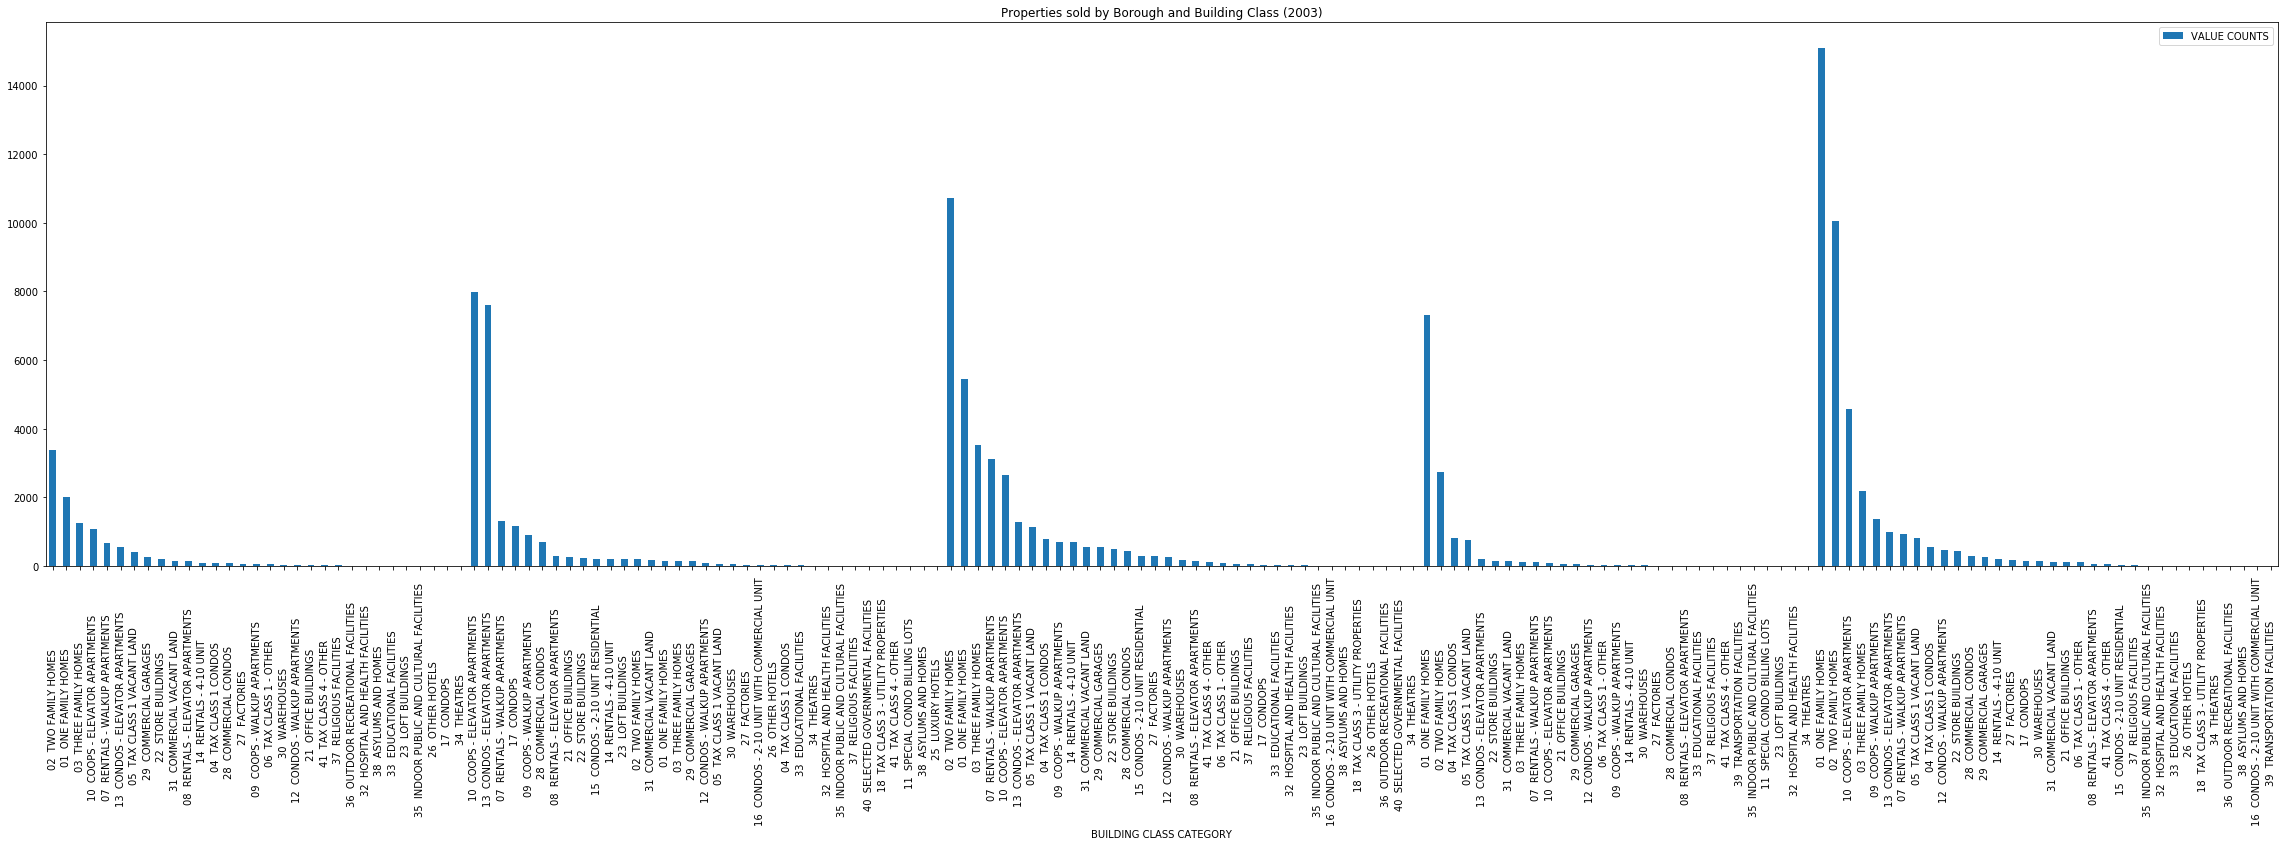

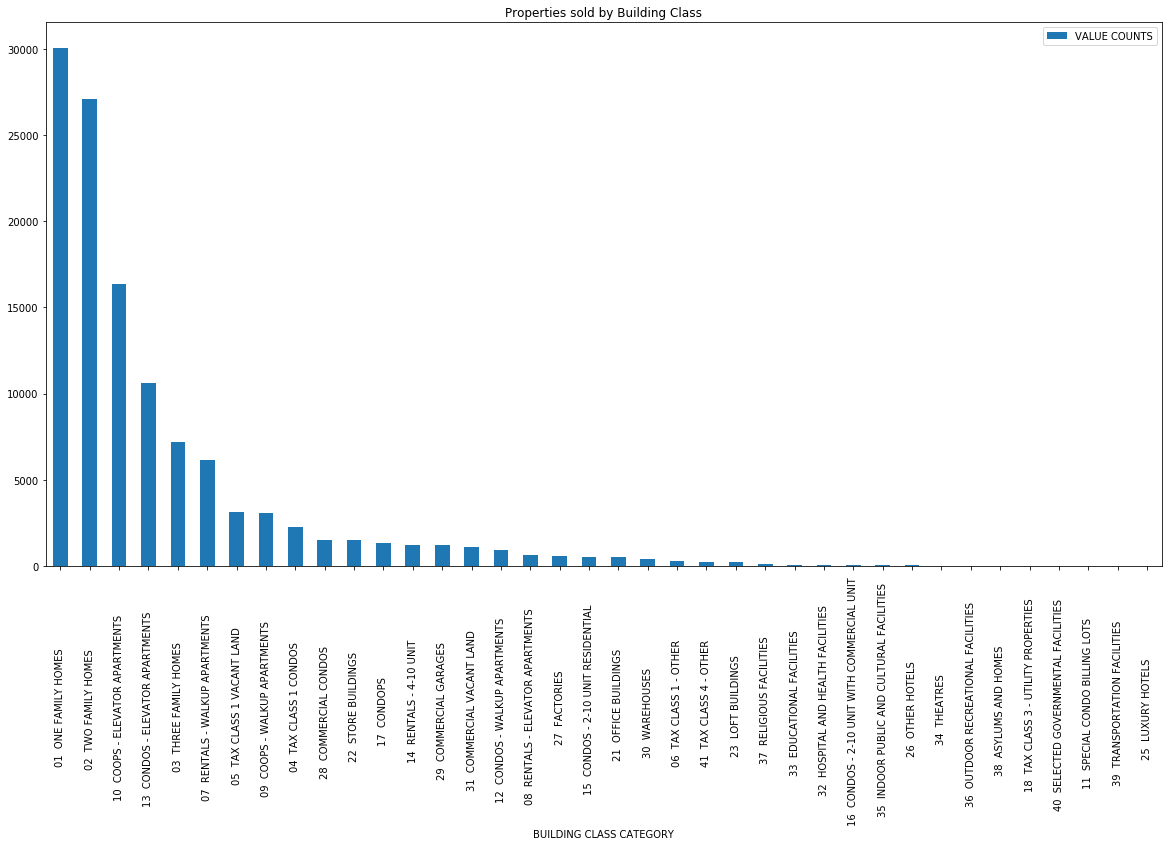

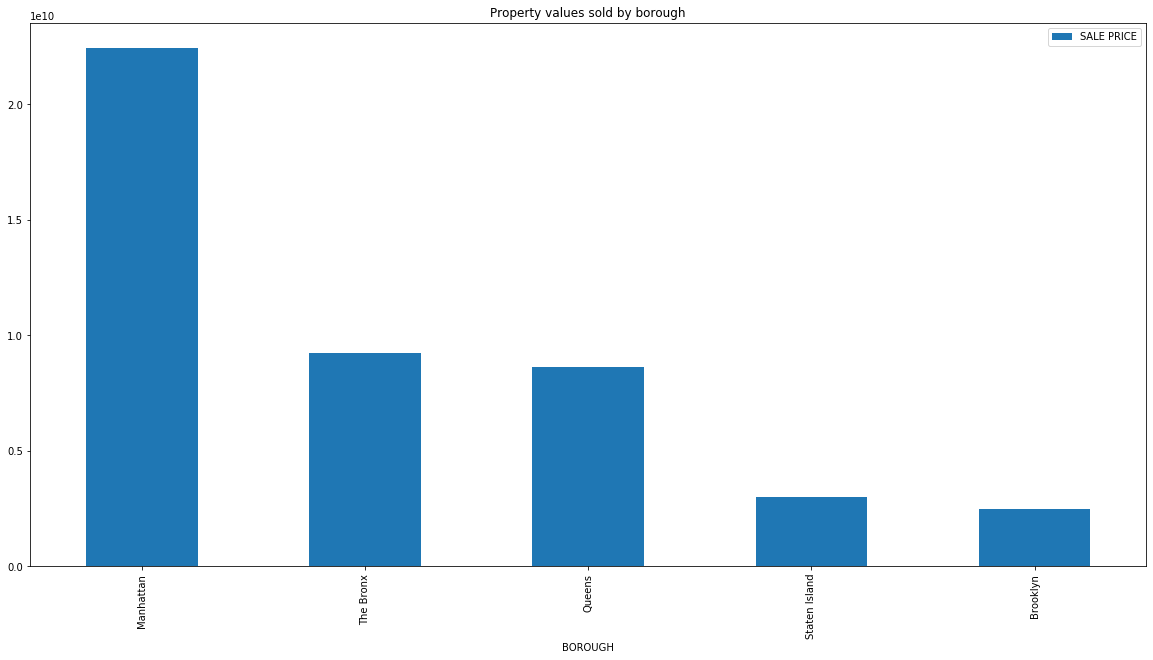

In [32]:
#Grouping by Borough and Building Class Category
sales_frame_borough = sales_frame.groupby(["BOROUGH"])
groupedby_borough_building_class = sales_frame_borough["BUILDING CLASS CATEGORY"].value_counts().reset_index(name="Index")
groupedby_borough_building_class.columns = ["BOROUGH", "BUILDING CLASS CATEGORY", "VALUE COUNTS"]

# Printing new dataframe
print(groupedby_borough_building_class)

# Exporting csv of sales value grouped by borough, building class category
#groupedby_borough_building_class.to_csv("data/groupedby_building_class_2003.csv", index_label=["Index"])

# Visualizing and saving image
groupedby_borough_building_class.plot.bar(x="BUILDING CLASS CATEGORY", y="VALUE COUNTS", title="Properties sold by Borough and Building Class (2003)", figsize=(40,10))
plt.savefig("data/Properties sold by BBC 2003.jpg", bbox_inches="tight")

# Grouping by Building Class Category
groupedby_building_class = sales_frame["BUILDING CLASS CATEGORY"].value_counts().reset_index(name="Index")
groupedby_building_class.columns = ["BUILDING CLASS CATEGORY", "VALUE COUNTS"]

#Printing new dataframe
#print(groupedby_building_class)

# Visualizing and saving image
groupedby_building_class.plot.bar(x="BUILDING CLASS CATEGORY", y="VALUE COUNTS", title="Properties sold by Building Class", figsize=(20,10))
plt.savefig("data/Properties sold by BC 2003.jpg", bbox_inches="tight")

# Grouping by Borough and Building Class Category
sales_frame_borough_price = sales_frame.groupby(["BOROUGH"])
groupedby_borough_price = sales_frame_borough_price["SALE PRICE"].sum().reset_index(name="Index")
groupedby_borough_price.columns = ["BOROUGH", "SALE PRICE"]

# Sorting after highest value
groupedby_borough_price = groupedby_borough_price.sort_values("SALE PRICE", ascending=False)

# Suppressing scientific float notation
pd.options.display.float_format = "{:.2f}".format

# Printing new dataframe
print(groupedby_borough_price)

# Exporting csv of sales prices grouped by borough
#groupedby_borough_price.to_csv("data/groupedby_borough_price_2003.csv", index_label=["Index"])

# Visualizing and saving image
groupedby_borough_price.plot.bar(x="BOROUGH", y="SALE PRICE", title="Property values sold by borough", figsize=(20,10))
plt.savefig("data/Property values sold by borough 2003.jpg", bbox_inches="tight")


### 2003

In [33]:
#Calculating number of sales/mean/median and top sale in 2003
sales_2003 = sales_frame[sales_frame["SALE DATE"].dt.year == 2003]
sales_max_2003 = sales_2003["SALE PRICE"].max()
sales_mean_2003 = sales_2003["SALE PRICE"].mean()
sales_total_2003 = sales_2003["SALE PRICE"].sum()
sales_median_2003 = sales_2003["SALE PRICE"].median()

# Adjusting mean because of $0 sales
sales_2003_adj = sales_2003[sales_2003["SALE PRICE"] > 0]
sales_2003_mean_adj = sales_2003_adj["SALE PRICE"].mean()

print("The number of sales in the year 2016 was ", len(sales_2003), " with the most expensive sale price being $", int(sales_max_2003), " and the average sale being $", int(sales_mean_2003), ".", sep="")
print("\nThe adjusted mean (dataframe cleared of $0 sales) is slightly higher being $", int(sales_2003_mean_adj), ".", sep="")
print("\nThe high number of $0 sales also lowers the median sale price to $", int(sales_median_2003), ".", sep="")
print("\nThe total amount spent for property sales in 2016 was $", int(sales_total_2003), ".", sep="")


The number of sales in the year 2016 was 118428 with the most expensive sale price being $1400000000 and the average sale being $386166.

The adjusted mean (dataframe cleared of $0 sales) is slightly higher being $562921.

The high number of $0 sales also lowers the median sale price to $213000.

The total amount spent for property sales in 2016 was $45732902506.


## Sales per Month


##### January

In [34]:
sales_jan_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 1]
print(len(sales_jan_2003))

9988


##### February

In [35]:
sales_feb_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 2]
print(len(sales_feb_2003))

8944


##### March

In [36]:
sales_mar_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 3]
print(len(sales_mar_2003))

10390


##### April

In [37]:
sales_apr_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 4]
print(len(sales_apr_2003))

8820


##### May

In [38]:
sales_may_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 5]
print(len(sales_may_2003))

9749


##### June

In [39]:
sales_jun_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 6]
print(len(sales_jun_2003))

9413


##### July

In [40]:
sales_jul_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 7]
print(len(sales_jul_2003))

10391


##### August

In [41]:
sales_aug_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 8]
print(len(sales_aug_2003))

9557


##### September

In [42]:
sales_sep_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 9]
print(len(sales_sep_2003))

9953


##### October

In [43]:
sales_oct_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 10]
print(len(sales_oct_2003))

11814


##### November

In [44]:
sales_nov_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 11]
print(len(sales_nov_2003))

9344


##### December

In [45]:
sales_dec_2003 = sales_2003[sales_2003["SALE DATE"].dt.month == 12]
print(len(sales_dec_2003))

10065


## Transactions without Sale Price

The number of property sales with a sale price of $0 is 37186.
The number of all property sales is 118428.
This equals to about 31.4%


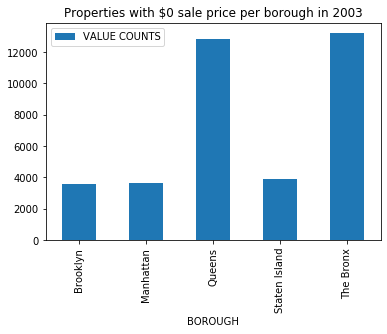

In [46]:
# Calculating sales without sale price
sales_zero = sales_frame[sales_frame["SALE PRICE"] == 0]
print("The number of property sales with a sale price of $0 is ", len(sales_zero), ".", sep="")

# Measuring total number of sales
print("The number of all property sales is ", len(sales_frame), ".", sep="")

# Sales without sale price in relation to all sales
sales_zero_percent = len(sales_frame[sales_frame["SALE PRICE"] == 0]) / len(sales_frame)
print("This equals to about ", round(sales_zero_percent * 100, 2), "%", sep="")

# Filtering dataframe "sales_zero" by borough
sales_zero_borough = sales_zero.groupby(["BOROUGH"])
groupedby_zero_borough = sales_zero_borough["SALE PRICE"].value_counts().reset_index(name="Index")
groupedby_zero_borough.columns = ["BOROUGH", "SALE PRICE", "VALUE COUNTS"]

# Printing new dataframe
#print(groupedby_zero_borough)

# Visualizing and saving image
groupedby_zero_borough.plot.bar(x="BOROUGH", y="VALUE COUNTS", title="Properties with $0 sale price per borough in 2003")

plt.savefig("data/Properties with $0 sale price per borough 2003.jpg", bbox_inches="tight")

#### Reasons for that

In [47]:
# Reasons for sale price of $0
print("\nA $0 sale indicates that there was a transfer of ownership without cash consideration. \nThere can be a number of reasons for that, for example transfers of ownership from parents to children.")
sales_almost_zero = sales_frame[(sales_frame["SALE PRICE"] < 100) & sales_frame["SALE PRICE"] != 0]
print("\nThere is also a small number of sales (", len(sales_almost_zero), ") that were made for insignificant values (for example < $100), which suggests the same as above.", sep="")


A $0 sale indicates that there was a transfer of ownership without cash consideration. 
There can be a number of reasons for that, for example transfers of ownership from parents to children.

There is also a small number of sales (126) that were made for insignificant values (for example < $100), which suggests the same as above.


## Locations of properties


### Sales in different boroughs

In [48]:
# Sorting the sales by boroughs
sales_manhattan = sales_frame[sales_frame["BOROUGH"] == "Manhattan"]
sales_brooklyn = sales_frame[sales_frame["BOROUGH"] == "Queens"]
sales_queens = sales_frame[sales_frame["BOROUGH"] == "Brooklyn"]
sales_the_bronx = sales_frame[sales_frame["BOROUGH"] == "The Bronx"]
sales_staten_island = sales_frame[sales_frame["BOROUGH"] == "Staten Island"]
print("(1) Manhattan:", len(sales_manhattan))
print("(2) Brooklyn:", len(sales_brooklyn))
print("(3) Queens:", len(sales_queens))
print("(4) The Bronx:", len(sales_the_bronx))
print("(5) Staten Island:", len(sales_staten_island))

(1) Manhattan: 22210
(2) Brooklyn: 33706
(3) Queens: 10664
(4) The Bronx: 39177
(5) Staten Island: 12671


### Sales in different neighborhoods


#### Top in Manhattan

In [49]:
sales_m_neighbor = sales_manhattan["NEIGHBORHOOD"].value_counts()
print(sales_m_neighbor.nlargest(10))

UPPER EAST SIDE (79-96)      2804
UPPER WEST SIDE (59-79)      2506
UPPER EAST SIDE (59-79)      2188
MIDTOWN EAST                 1529
MIDTOWN WEST                 1389
UPPER WEST SIDE (79-96)      1285
CHELSEA                       898
HARLEM-CENTRAL                889
GREENWICH VILLAGE-CENTRAL     790
MURRAY HILL                   773
Name: NEIGHBORHOOD, dtype: int64


#### Top in Brooklyn

In [50]:
sales_b_neighbor = sales_brooklyn["NEIGHBORHOOD"].value_counts()
print(sales_b_neighbor.nlargest(10))

BEDFORD STUYVESANT           2583
CANARSIE                     2109
EAST NEW YORK                2108
BUSHWICK                     1542
BOROUGH PARK                 1434
FLATBUSH-EAST                1371
BAY RIDGE                    1262
CROWN HEIGHTS                1250
SHEEPSHEAD BAY               1057
OCEAN HILL                   1000
Name: NEIGHBORHOOD, dtype: int64


#### Top in Queens

In [51]:
sales_q_neighbor = sales_queens["NEIGHBORHOOD"].value_counts()
print(sales_q_neighbor.nlargest(10))

SOUNDVIEW                    763
RIVERDALE                    743
WILLIAMSBRIDGE               715
BAYCHESTER                   700
PARKCHESTER                  691
MORRISANIA/LONGWOOD          669
THROGS NECK                  547
BRONXDALE                    479
WAKEFIELD                    436
MORRIS PARK/VAN NEST         385
Name: NEIGHBORHOOD, dtype: int64


#### Top in The Bronx

In [52]:
sales_tb_neighbor = sales_the_bronx["NEIGHBORHOOD"].value_counts()
print(sales_tb_neighbor.nlargest(10))

FLUSHING-NORTH               3141
JACKSON HEIGHTS              1763
RICHMOND HILL                1641
BAYSIDE                      1420
FOREST HILLS                 1344
ELMHURST                     1286
ASTORIA                      1280
SOUTH OZONE PARK             1206
SO. JAMAICA-BAISLEY PARK     1199
CORONA                       1170
Name: NEIGHBORHOOD, dtype: int64


#### Top in Staten Island

In [53]:
sales_si_neighbor = sales_staten_island["NEIGHBORHOOD"].value_counts()
print(sales_si_neighbor.nlargest(10))

GREAT KILLS                  1105
NEW SPRINGVILLE               675
BULLS HEAD                    603
WEST NEW BRIGHTON             548
ARDEN HEIGHTS                 538
MARINERS HARBOR               482
MIDLAND BEACH                 453
ELTINGVILLE                   442
TOTTENVILLE                   439
SOUTH BEACH                   436
Name: NEIGHBORHOOD, dtype: int64


### Buildings sold per building class

In [54]:
# Sales per building class category
sales_per_building_class = sales_frame["BUILDING CLASS CATEGORY"].value_counts()
print(sales_per_building_class)

# Grouping sales by borough, neighborhood and building class category
sales_grouped = sales_frame.groupby(['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']).sum()
columns_del = [ "BLOCK", "LOT", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "YEAR BUILT", "TAX CLASS AT TIME OF SALE"]
sales_grouped = sales_grouped.drop(columns_del, 1)
sales_grouped_desc = sales_grouped.sort_values(by=["SALE PRICE"], ascending=False)
print(sales_grouped_desc)

#exporting csv of sales value grouped by borough, neighborhood, building class category
#sales_grouped_desc.to_csv("data/grouped_sales2003.csv", index_label=["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY"])



01  ONE FAMILY HOMES                            30032
02  TWO FAMILY HOMES                            27060
10  COOPS - ELEVATOR APARTMENTS                 16360
13  CONDOS - ELEVATOR APARTMENTS                10601
03  THREE FAMILY HOMES                           7186
07  RENTALS - WALKUP APARTMENTS                  6120
05  TAX CLASS 1 VACANT LAND                      3143
09  COOPS - WALKUP APARTMENTS                    3054
04  TAX CLASS 1 CONDOS                           2275
28  COMMERCIAL CONDOS                            1512
22  STORE BUILDINGS                              1497
17  CONDOPS                                      1350
14  RENTALS - 4-10 UNIT                          1239
29  COMMERCIAL GARAGES                           1233
31  COMMERCIAL VACANT LAND                       1121
12  CONDOS - WALKUP APARTMENTS                    905
08  RENTALS - ELEVATOR APARTMENTS                 642
27  FACTORIES                                     558
15  CONDOS - 2-10 UNIT RESID